In [1]:
from PIL import Image
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from xml.dom import minidom

In [2]:
class_list = {'7up':0, 'aquafina':1}

In [3]:
def get_box_from_xmldoc(xmldoc):
    label = xmldoc.getElementsByTagName('name')
    label = label[0].firstChild.data
    label = class_list[label]
    xmin = xmldoc.getElementsByTagName('xmin')
    xmin = xmin[0].firstChild.data
    ymin = xmldoc.getElementsByTagName('ymin')
    ymin = ymin[0].firstChild.data
    xmax = xmldoc.getElementsByTagName('xmax')
    xmax = xmax[0].firstChild.data
    ymax = xmldoc.getElementsByTagName('ymax')
    ymax = ymax[0].firstChild.data
    return label, xmin, ymin, xmax, ymax

In [4]:
image_list = []
for filename in glob.glob('TrainImage/*.jpg'):
    img = Image.open(filename)
    img.load()
    img = np.asarray(img)
    image_list.append(img)

In [5]:
image_list = np.asarray(image_list,dtype='uint8')

In [6]:
image_list.shape

(174, 480, 640, 3)

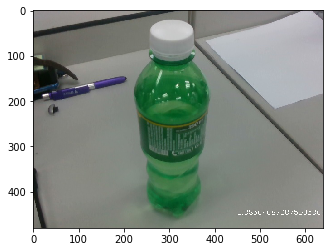

In [7]:
imgplot = plt.imshow(image_list[150])

In [8]:
box_list = []
for filename in glob.glob('TrainAnnotation/*.xml'):
    xmldoc = minidom.parse(filename)
    box = get_box_from_xmldoc(xmldoc)
    box = np.asarray(box, dtype='int32')
    box = np.expand_dims(box, axis=0)
    box_list.append(box)

In [9]:
box_list = np.asarray(box_list)

In [10]:
box_list[1].shape

(1, 5)

In [11]:
np.savez('bottle.npz', images=image_list, boxes=box_list)

In [12]:
x = np.load('bottle.npz')

[[  1 260  67 398 361]]


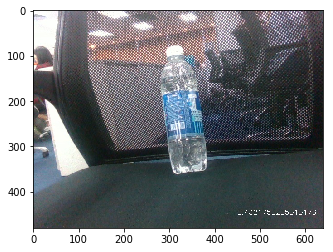

In [13]:
n=25
print(x['boxes'][n])
imgplot = plt.imshow(x['images'][n])

In [15]:
y = np.load('bottle2.npz')
image_list = np.append(x['images'],y['images'],axis=0)
box_list = np.append(x['boxes'],y['boxes'],axis=0)

In [17]:
image_list.shape

(333, 480, 640, 3)

In [20]:
box_list.shape

(333, 1, 5)

In [21]:
np.savez('bottle_all.npz', images=image_list, boxes=box_list)